## Question 1

In [152]:
import torch
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 

import torchvision
from torch.utils.data import DataLoader 
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import random_split

import matplotlib.pyplot as plt
import numpy as np

In [153]:
batch_size = 256
train_val_dataset = datasets.CIFAR10( 
    root="dataset/",
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)


test_dataset = datasets.CIFAR10(
    root="dataset/",
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)




Files already downloaded and verified
Files already downloaded and verified


In [154]:
torch.manual_seed(43)
val_size = 5000
train_size = len(train_val_dataset) - val_size

train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])
len(train_dataset), len(val_dataset)

(45000, 5000)

In [155]:
train_loader = DataLoader( dataset=train_dataset, batch_size=batch_size, shuffle=True )
val_loader = DataLoader( dataset=val_dataset, batch_size=batch_size, shuffle=True )
test_loader = DataLoader( dataset=test_dataset, batch_size=batch_size, shuffle=True )

In [156]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: dataset/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [157]:
train_dataset[0]
#contains 32x32 R G B values and the class it belongs to

(tensor([[[0.0549, 0.0510, 0.0510,  ..., 0.0471, 0.0471, 0.0392],
          [0.0549, 0.0510, 0.0510,  ..., 0.0471, 0.0471, 0.0392],
          [0.0549, 0.0549, 0.0549,  ..., 0.0471, 0.0471, 0.0392],
          ...,
          [0.5176, 0.6902, 0.4196,  ..., 0.4431, 0.0784, 0.0588],
          [0.6667, 0.6863, 0.7216,  ..., 0.4314, 0.1216, 0.0627],
          [0.6353, 0.6745, 0.6588,  ..., 0.5255, 0.1843, 0.0667]],
 
         [[0.0510, 0.0471, 0.0431,  ..., 0.0431, 0.0431, 0.0353],
          [0.0510, 0.0471, 0.0471,  ..., 0.0431, 0.0431, 0.0353],
          [0.0510, 0.0510, 0.0510,  ..., 0.0431, 0.0431, 0.0353],
          ...,
          [0.5216, 0.6863, 0.4078,  ..., 0.4353, 0.0706, 0.0549],
          [0.6667, 0.6824, 0.7098,  ..., 0.4314, 0.1137, 0.0588],
          [0.6353, 0.6667, 0.6431,  ..., 0.5255, 0.1804, 0.0667]],
 
         [[0.0431, 0.0392, 0.0353,  ..., 0.0353, 0.0353, 0.0275],
          [0.0431, 0.0392, 0.0392,  ..., 0.0353, 0.0353, 0.0275],
          [0.0431, 0.0431, 0.0392,  ...,

In [158]:
print(train_dataset[0][0].shape)
print(train_dataset[0][0].shape)

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


First image of the first 10 batches in the dataset:

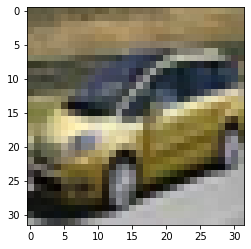

torch.Size([256, 3, 32, 32])


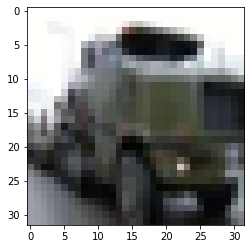

torch.Size([256, 3, 32, 32])


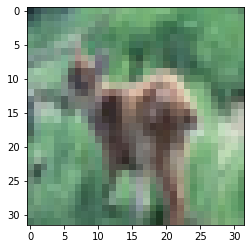

torch.Size([256, 3, 32, 32])


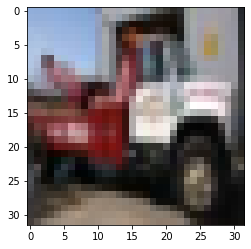

torch.Size([256, 3, 32, 32])


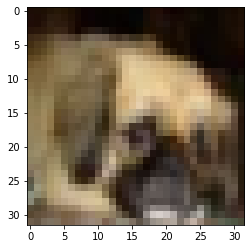

torch.Size([256, 3, 32, 32])


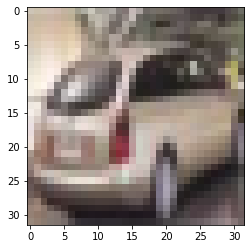

torch.Size([256, 3, 32, 32])


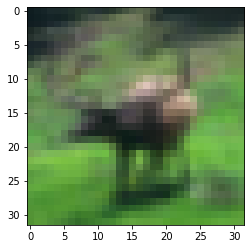

torch.Size([256, 3, 32, 32])


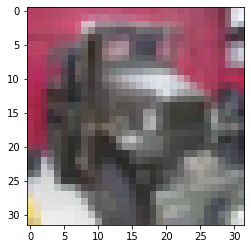

torch.Size([256, 3, 32, 32])


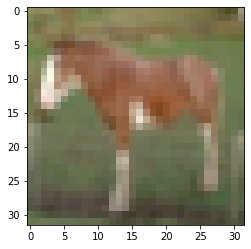

torch.Size([256, 3, 32, 32])


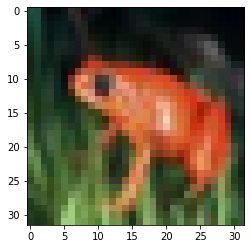

torch.Size([256, 3, 32, 32])


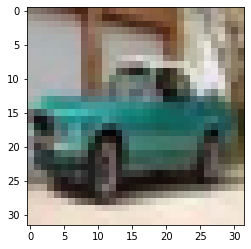

torch.Size([256, 3, 32, 32])


In [159]:
def imshow(img):

  npimg = img.numpy()   # convert from tensor to numpy
  plt.imshow(np.transpose(npimg, (1, 2, 0))) 
  plt.show()

for batch_idx, (data, targets) in enumerate(train_loader):
    if(batch_idx >10): break
    imshow(torchvision.utils.make_grid(data[0]))
    print(data.shape)

In [160]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes, activation='sigmoid'):

        super().__init__()
        # Activation functions

        if activation == 'relu':
            self.activation = nn.ReLU()

        elif activation == 'tanh':
            self.activation = nn.Tanh()

        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        
        elif activation == 'leakyrelu':
            self.activation = nn.LeakyReLU()


        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 32)
        self.linear5 = nn.Linear(32, num_classes)

    def forward(self, xb):

        out = self.activation(self.linear1(xb))

        out = self.activation(self.linear2(out))

        out = self.activation(self.linear3(out))

        out = self.activation(self.linear4(out))
        out = self.linear5(out)
        return out



In [203]:
train_losses=[]
train_accu=[]

eval_losses=[]
eval_accu=[]

weights_l1_e1 = []
weights_l1_en = []

def test(loader, model, eval_losses = eval_losses, eval_accu = eval_accu, loss_type = 'val'):
    model.eval()

    running_loss=0
    correct=0
    total=0

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            x = torch.flatten(x,1)

            scores = model(x)

            loss= criterion(scores,y)
            running_loss+=loss.item()
            
            _, predicted = scores.max(1)
            total += y.size(0)
            correct += predicted.eq(y).sum().item()

    test_loss=running_loss/len(loader)
    accu=100.*correct/total

    eval_losses.append(test_loss)
    eval_accu.append(accu)

    if(loss_type == 'val'):
        print('Validation Loss: %.3f | Accuracy: %.3f'%(test_loss,accu))
    else:
        print('Test Loss: %.3f | Accuracy: %.3f'%(test_loss,accu))



    model.train()


def train(loader, model, train_losses, train_accu, eval_losses, eval_accu, show_weights = False):

    for epoch in range(num_epochs):
        # print(f"Epoch: {epoch}")

        running_loss=0
        correct=0
        total=0
        
        ################
        if(show_weights):
            if(epoch == 0):
                weights_l1_e1 = torch.Tensor(model.linear3.weight)
                print(weights_l1_e1)

            if(epoch == num_epochs-1):
                weights_l1_en = torch.Tensor(model.linear3.weight)
                print(weights_l1_en)
        
        #################


        for batch_idx, (data, targets) in enumerate(train_loader):

            # Get data to cuda if possible
            data = data.to(device=device)
            targets = targets.to(device=device)

            data = torch.flatten(data,1)
            # print(data.shape)


            # forward propagation
            scores = model(data)

            loss = criterion(scores, targets)


            optimizer.zero_grad()
            loss.backward()
            optimizer.step()



            running_loss += loss.item()
        
            _, predicted = scores.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()


        train_loss=running_loss/len(train_loader)
        accu=100.*correct/total

        train_accu.append(accu)
        train_losses.append(train_loss)
        print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu), end = ' | ')

        test(val_loader, model, eval_losses, eval_accu)


# 1.1 Comparing activation functions => a)Sigmoid, b) Tanh and c) ReLU 

1.a) Model with Sigmoid Activation Function:

In [162]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 3072 # 32x32x3 = 3072, size of CIFAR10 images (RGB)
num_classes = 10
learning_rate = 0.001
num_epochs = 40

model = NN(input_size=input_size, num_classes=num_classes, activation = 'sigmoid').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

train_loss_sig = []
train_acc_sig = []
val_loss_sig = []
val_acc_sig = []

In [163]:
train(train_loader, model, train_loss_sig, train_acc_sig, val_loss_sig, val_acc_sig)

Train Loss: 2.215 | Accuracy: 15.393 | Validation Loss: 2.097 | Accuracy: 18.220
Train Loss: 2.046 | Accuracy: 19.998 | Validation Loss: 2.030 | Accuracy: 20.700
Train Loss: 2.010 | Accuracy: 21.913 | Validation Loss: 1.995 | Accuracy: 23.380
Train Loss: 1.944 | Accuracy: 26.371 | Validation Loss: 1.894 | Accuracy: 28.460
Train Loss: 1.857 | Accuracy: 31.024 | Validation Loss: 1.845 | Accuracy: 31.680
Train Loss: 1.805 | Accuracy: 33.736 | Validation Loss: 1.818 | Accuracy: 32.920
Train Loss: 1.766 | Accuracy: 34.978 | Validation Loss: 1.759 | Accuracy: 35.980
Train Loss: 1.721 | Accuracy: 36.893 | Validation Loss: 1.719 | Accuracy: 37.080
Train Loss: 1.678 | Accuracy: 38.678 | Validation Loss: 1.693 | Accuracy: 38.180
Train Loss: 1.649 | Accuracy: 40.051 | Validation Loss: 1.663 | Accuracy: 39.980
Train Loss: 1.612 | Accuracy: 41.436 | Validation Loss: 1.647 | Accuracy: 40.260
Train Loss: 1.580 | Accuracy: 42.558 | Validation Loss: 1.647 | Accuracy: 39.880
Train Loss: 1.559 | Accuracy

In [164]:
# check_accuracy(train_loader, model)
test(test_loader, model,loss_type = 'test')

Test Loss: 1.462 | Accuracy: 49.430


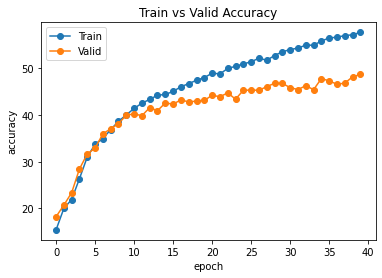

In [165]:
#plot accuracy

plt.plot(train_acc_sig,'-o')
plt.plot(val_acc_sig,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')

plt.show()

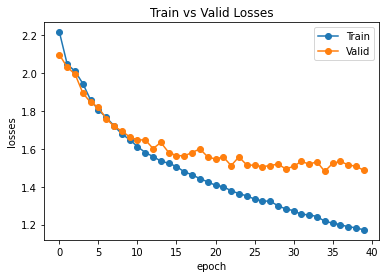

In [166]:
#plot losses

plt.plot(train_loss_sig,'-o')
plt.plot(val_loss_sig,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

1.b) Model with Tanh Activation Function:

In [167]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 3072 # 32x32x3 = 3072, size of CIFAR10 images (RGB)
num_classes = 10
learning_rate = 0.001
num_epochs = 40

model = NN(input_size=input_size, num_classes=num_classes, activation = 'tanh').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

train_loss_tanh = []
train_acc_tanh = []
val_loss_tanh = []
val_acc_tanh = []

In [168]:
train(train_loader, model, train_loss_tanh, train_acc_tanh, val_loss_tanh, val_acc_tanh)

Train Loss: 1.947 | Accuracy: 28.900 | Validation Loss: 1.820 | Accuracy: 34.800
Train Loss: 1.785 | Accuracy: 35.318 | Validation Loss: 1.752 | Accuracy: 37.260
Train Loss: 1.729 | Accuracy: 37.816 | Validation Loss: 1.735 | Accuracy: 36.940
Train Loss: 1.691 | Accuracy: 39.129 | Validation Loss: 1.693 | Accuracy: 39.460
Train Loss: 1.657 | Accuracy: 40.269 | Validation Loss: 1.782 | Accuracy: 36.640
Train Loss: 1.634 | Accuracy: 41.469 | Validation Loss: 1.640 | Accuracy: 40.480
Train Loss: 1.613 | Accuracy: 42.027 | Validation Loss: 1.680 | Accuracy: 39.160
Train Loss: 1.597 | Accuracy: 42.544 | Validation Loss: 1.620 | Accuracy: 41.660
Train Loss: 1.565 | Accuracy: 43.711 | Validation Loss: 1.619 | Accuracy: 42.080
Train Loss: 1.563 | Accuracy: 43.456 | Validation Loss: 1.644 | Accuracy: 41.120
Train Loss: 1.547 | Accuracy: 44.082 | Validation Loss: 1.659 | Accuracy: 39.340
Train Loss: 1.535 | Accuracy: 44.713 | Validation Loss: 1.611 | Accuracy: 42.260
Train Loss: 1.525 | Accuracy

In [169]:
# check_accuracy(train_loader, model)
test(test_loader, model, loss_type = 'test')

Test Loss: 1.502 | Accuracy: 46.210


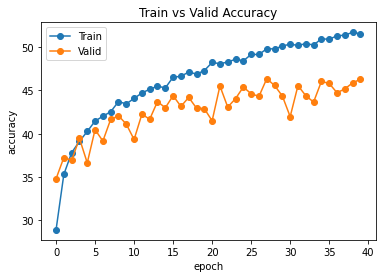

In [170]:
#plot accuracy

plt.plot(train_acc_tanh,'-o')
plt.plot(val_acc_tanh,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')

plt.show()

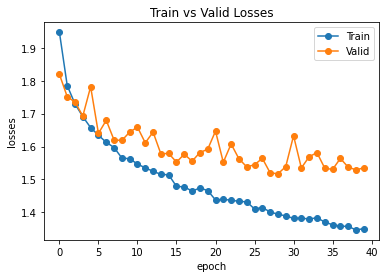

In [171]:
#plot losses

plt.plot(train_loss_tanh,'-o')
plt.plot(val_loss_tanh,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

1.c) Model with ReLU Activation Function:

In [172]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 3072 # 32x32x3 = 3072, size of CIFAR10 images (RGB)
num_classes = 10
learning_rate = 0.001
num_epochs = 40

model = NN(input_size=input_size, num_classes=num_classes, activation = 'relu').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

train_loss_relu = []
train_acc_relu = []
val_loss_relu = []
val_acc_relu = []

In [173]:
train(train_loader, model, train_loss_relu, train_acc_relu, val_loss_relu, val_acc_relu)

Train Loss: 2.012 | Accuracy: 25.142 | Validation Loss: 1.894 | Accuracy: 30.660
Train Loss: 1.787 | Accuracy: 35.009 | Validation Loss: 1.771 | Accuracy: 35.740
Train Loss: 1.690 | Accuracy: 38.947 | Validation Loss: 1.672 | Accuracy: 39.760
Train Loss: 1.623 | Accuracy: 41.767 | Validation Loss: 1.617 | Accuracy: 41.900
Train Loss: 1.573 | Accuracy: 43.282 | Validation Loss: 1.597 | Accuracy: 42.520
Train Loss: 1.526 | Accuracy: 45.107 | Validation Loss: 1.541 | Accuracy: 44.500
Train Loss: 1.487 | Accuracy: 46.436 | Validation Loss: 1.546 | Accuracy: 45.520
Train Loss: 1.459 | Accuracy: 47.542 | Validation Loss: 1.534 | Accuracy: 44.460
Train Loss: 1.427 | Accuracy: 48.729 | Validation Loss: 1.543 | Accuracy: 45.420
Train Loss: 1.409 | Accuracy: 49.351 | Validation Loss: 1.499 | Accuracy: 46.580
Train Loss: 1.376 | Accuracy: 50.840 | Validation Loss: 1.485 | Accuracy: 47.180
Train Loss: 1.345 | Accuracy: 52.080 | Validation Loss: 1.463 | Accuracy: 48.360
Train Loss: 1.326 | Accuracy

In [174]:
# check_accuracy(train_loader, model)
test(test_loader, model, loss_type = 'test')

Test Loss: 1.511 | Accuracy: 51.920


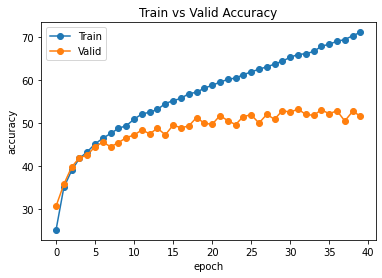

In [175]:
#plot accuracy

plt.plot(train_acc_relu,'-o')
plt.plot(val_acc_relu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')

plt.show()

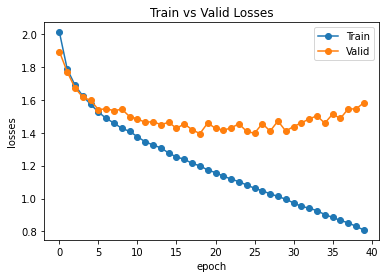

In [176]:
#plot losses

plt.plot(train_loss_relu,'-o')
plt.plot(val_loss_relu,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

## Comparing the results of above activation functions:

a) Train Accuracy:

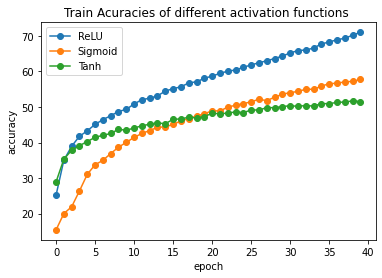

In [177]:
plt.plot(train_acc_relu,'-o')
plt.plot(train_acc_sig,'-o')
plt.plot(train_acc_tanh,'-o')

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['ReLU','Sigmoid','Tanh' ])
plt.title('Train Acuracies of different activation functions ')

plt.show()

Vaidation Accuracy:

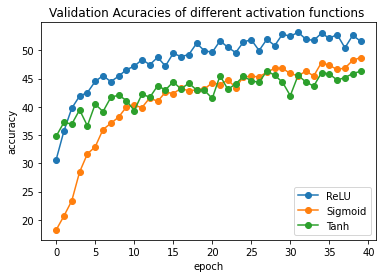

In [178]:
plt.plot(val_acc_relu,'-o')
plt.plot(val_acc_sig,'-o')
plt.plot(val_acc_tanh,'-o')

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['ReLU','Sigmoid','Tanh' ])
plt.title('Validation Acuracies of different activation functions ')

plt.show()

Train Losses:

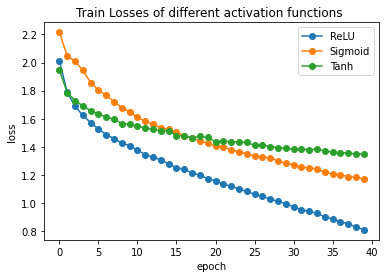

In [179]:
plt.plot(train_loss_relu,'-o')
plt.plot(train_loss_sig,'-o')
plt.plot(train_loss_tanh,'-o')

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['ReLU','Sigmoid','Tanh' ])
plt.title('Train Losses of different activation functions ')

plt.show()

Validation Losses

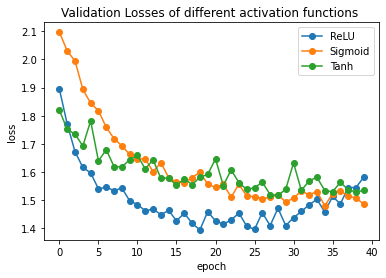

In [180]:
plt.plot(val_loss_relu,'-o')
plt.plot(val_loss_sig,'-o')
plt.plot(val_loss_tanh,'-o')

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['ReLU','Sigmoid','Tanh' ])
plt.title('Validation Losses of different activation functions ')

plt.show()

Obtained accuracies on test data:

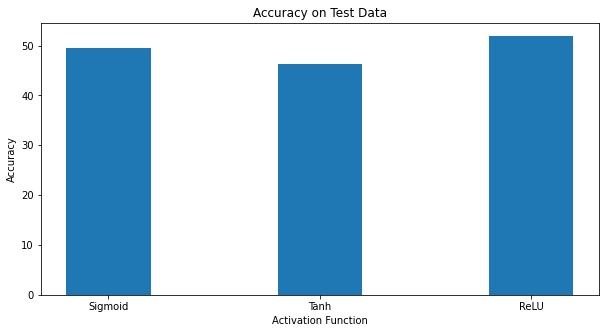

In [181]:
fig = plt.figure(figsize = (10, 5))

fns = [ 'Sigmoid', 'Tanh', 'ReLU']
# creating the bar plot
plt.bar(fns, eval_accu, width = 0.4)
 
plt.xlabel("Activation Function")
plt.ylabel("Accuracy")
plt.title("Accuracy on Test Data")
plt.show()

In [182]:
eval_accu

[49.43, 46.21, 51.92]

# 1.2 Detecting Vanishing Gradient Problem in a Deep Neural Network

In [183]:
class Deep_NN(nn.Module):
    def __init__(self, input_size, num_classes, activation='sigmoid'):

        super().__init__()
        # Activation functions

        if activation == 'relu':
            self.activation = nn.ReLU()

        elif activation == 'tanh':
            self.activation = nn.Tanh()

        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        
        elif activation == 'leakyrelu':
            self.activation = nn.LeakyReLU()


        self.linear1 = nn.Linear(input_size, 2048)
        self.linear2 = nn.Linear(2048, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, 256)
        self.linear5 = nn.Linear(256, 128)
        self.linear6 = nn.Linear(128, 64)
        self.linear7 = nn.Linear(64, 32)
        self.linear8 = nn.Linear(32, num_classes)

    def forward(self, xb):

        out = self.activation(self.linear1(xb))

        out = self.activation(self.linear2(out))
        out = self.activation(self.linear3(out))
        out = self.activation(self.linear4(out))
        out = self.activation(self.linear5(out))
        out = self.activation(self.linear6(out))
        out = self.activation(self.linear7(out))

        out = self.linear8(out)
        return out


In [184]:
device = 'cpu'
input_size = 3072 # 32x32x3 = 3072, size of CIFAR10 images (RGB)
num_classes = 10
learning_rate = 0.001
num_epochs = 20

model_deep = Deep_NN(input_size=input_size, num_classes=num_classes, activation = 'sigmoid').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep.parameters(), lr=learning_rate, weight_decay=1e-5)

train_loss_vg = []
train_acc_vg = []
val_loss_vg = []
val_acc_vg = []

In [185]:
print(model_deep)

Deep_NN(
  (activation): Sigmoid()
  (linear1): Linear(in_features=3072, out_features=2048, bias=True)
  (linear2): Linear(in_features=2048, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=512, bias=True)
  (linear4): Linear(in_features=512, out_features=256, bias=True)
  (linear5): Linear(in_features=256, out_features=128, bias=True)
  (linear6): Linear(in_features=128, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=32, bias=True)
  (linear8): Linear(in_features=32, out_features=10, bias=True)
)


In [202]:
train_losses=[]
train_accu=[]

eval_losses=[]
eval_accu=[]

weights_l1_e1 = []
weights_l1_en = []


mean = [[],[],[],[],[],[],[],[]]
std =  [[],[],[],[],[],[],[],[]]

def test(loader, model, eval_losses = eval_losses, eval_accu = eval_accu, loss_type = 'val'):
    model.eval()

    running_loss=0
    correct=0
    total=0

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            x = torch.flatten(x,1)

            scores = model(x)

            loss= criterion(scores,y)
            running_loss+=loss.item()
            
            _, predicted = scores.max(1)
            total += y.size(0)
            correct += predicted.eq(y).sum().item()

    test_loss=running_loss/len(loader)
    accu=100.*correct/total

    eval_losses.append(test_loss)
    eval_accu.append(accu)

    if(loss_type == 'val'):
        print('Validation Loss: %.3f | Accuracy: %.3f'%(test_loss,accu))
    else:
        print('Test Loss: %.3f | Accuracy: %.3f'%(test_loss,accu))

    model.train()


def train_(loader, model, train_losses, train_accu, eval_losses, eval_accu, show_weights = True):

    for epoch in range(num_epochs):
        print(f"Epoch: {epoch}", end=' | ')

        running_loss=0
        correct=0
        total=0

        ##############################
        if(show_weights):
            if(epoch == 0):
                weights_l1_e1 = torch.Tensor(model.linear3.weight)
                print(weights_l1_e1)

            if(epoch == num_epochs-1):
                weights_l1_en = torch.Tensor(model.linear3.weight)
                print(weights_l1_en)
        
        #################################
        w1 = model.linear1.weight
        w2 = model.linear2.weight
        w3 = model.linear3.weight
        w4 = model.linear4.weight
        w5 = model.linear5.weight
        w6 = model.linear6.weight
        w7 = model.linear7.weight
        w8 = model.linear8.weight

        W = [w1,w2,w3,w4,w5,w6,w7,w8]

        for i in range(0,8):
            mean[i].append(torch.mean(w1).detach().numpy())
            std[i].append(torch.std(w1).detach().numpy())


        ###################################



        for batch_idx, (data, targets) in enumerate(train_loader):

            # Get data to cuda if possible
            data = data.to(device=device)
            targets = targets.to(device=device)

            data = torch.flatten(data,1)
            # print(data.shape)


            # forward propagation
            scores = model(data)

            loss = criterion(scores, targets)


            optimizer.zero_grad()
            loss.backward()
            optimizer.step()



            running_loss += loss.item()

            _, predicted = scores.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()


        train_loss=running_loss/len(train_loader)
        accu=100.*correct/total

        train_accu.append(accu)
        train_losses.append(train_loss)
        print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu), end = ' | ')

        test(val_loader, model, eval_losses, eval_accu)


In [187]:
train_(train_loader, model_deep, train_loss_vg, train_acc_vg, val_loss_vg, val_acc_vg)

Epoch: 0 | tensor([[ 2.3753e-02, -2.7190e-02, -2.8902e-02,  ...,  8.9057e-03,
         -1.2379e-02, -8.3199e-03],
        [-2.1794e-02,  1.5212e-02,  1.1324e-03,  ..., -1.3852e-02,
         -2.2154e-03, -6.8201e-03],
        [-1.2888e-02, -2.3637e-02,  5.2423e-03,  ...,  2.2911e-02,
          1.8882e-02,  4.5790e-03],
        ...,
        [-1.5355e-02, -1.9397e-02, -1.0662e-02,  ...,  2.1375e-02,
         -1.7972e-02,  1.7158e-02],
        [ 2.5957e-02, -2.1078e-02,  1.8946e-02,  ...,  5.5235e-05,
          7.6468e-04, -2.3417e-02],
        [ 1.2673e-03, -5.7958e-03,  2.4144e-02,  ..., -1.1342e-02,
         -5.7535e-03,  5.3652e-03]], grad_fn=<AliasBackward0>)
Train Loss: 2.305 | Accuracy: 9.896 | Validation Loss: 2.303 | Accuracy: 10.400
Epoch: 1 | Train Loss: 2.304 | Accuracy: 10.178 | Validation Loss: 2.305 | Accuracy: 9.880
Epoch: 2 | Train Loss: 2.304 | Accuracy: 9.820 | Validation Loss: 2.304 | Accuracy: 9.880
Epoch: 3 | Train Loss: 2.303 | Accuracy: 9.967 | Validation Loss: 2.30

In [188]:
test(test_loader, model_deep, loss_type = 'test')

Test Loss: 2.303 | Accuracy: 10.000


In [189]:
mean[0]

[array(-6.696604e-06, dtype=float32),
 array(-3.6651937e-08, dtype=float32),
 array(1.8792383e-09, dtype=float32),
 array(-1.8466595e-08, dtype=float32),
 array(8.2010215e-10, dtype=float32),
 array(-6.283946e-09, dtype=float32),
 array(3.9298156e-09, dtype=float32),
 array(5.397004e-11, dtype=float32),
 array(8.404876e-09, dtype=float32),
 array(-1.2896667e-09, dtype=float32),
 array(4.5852367e-11, dtype=float32),
 array(5.70931e-08, dtype=float32),
 array(9.536094e-09, dtype=float32),
 array(-4.0154724e-10, dtype=float32),
 array(-3.173277e-09, dtype=float32),
 array(2.2546913e-09, dtype=float32),
 array(2.3392674e-09, dtype=float32),
 array(4.170261e-11, dtype=float32),
 array(1.6530478e-11, dtype=float32),
 array(8.2945834e-10, dtype=float32)]

In [209]:
std_[1][1:]

[array(6.6884513e-07, dtype=float32),
 array(1.538251e-08, dtype=float32),
 array(2.350633e-08, dtype=float32),
 array(1.3263513e-09, dtype=float32),
 array(1.2731646e-08, dtype=float32),
 array(4.627602e-09, dtype=float32),
 array(6.901466e-09, dtype=float32),
 array(8.174545e-09, dtype=float32),
 array(7.2415646e-10, dtype=float32),
 array(5.846846e-11, dtype=float32),
 array(5.3322093e-08, dtype=float32),
 array(1.143454e-08, dtype=float32),
 array(1.8172789e-09, dtype=float32),
 array(2.3903515e-09, dtype=float32),
 array(1.0285953e-09, dtype=float32),
 array(2.1457383e-09, dtype=float32),
 array(3.8897385e-11, dtype=float32),
 array(5.259136e-11, dtype=float32),
 array(0.01041518, dtype=float32),
 array(0.00861703, dtype=float32),
 array(0.00972851, dtype=float32),
 array(0.01097181, dtype=float32),
 array(0.01197104, dtype=float32),
 array(0.01266506, dtype=float32),
 array(0.01336689, dtype=float32),
 array(0.01378032, dtype=float32),
 array(0.01431779, dtype=float32),
 array(0.

Comparing Mean and Standard Deviation:

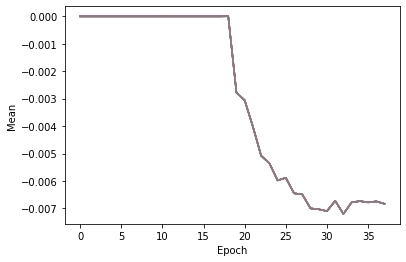

In [210]:
#mean_ = mean
for i in range(0,8):
    #mean_[i].pop()
    plt.plot(mean_[i][1:], '-')

plt.xlabel('Epoch')
plt.ylabel('Mean')

# plt.legend(['Train Accuracy with L2','Val Accuracy with L2','Train Accuracy without L2','Val Accuracy without L2' ])
# plt.title('Comparision of results before and after regularization')

plt.show()

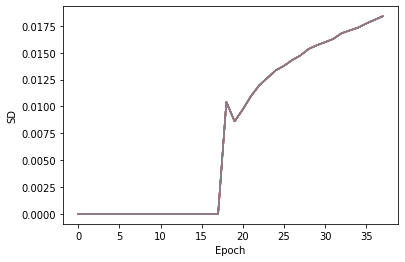

In [211]:
#std_ = std
for i in range(0,8):
    #std_[i].pop()
    plt.plot(std_[i][1:], '-')

plt.xlabel('Epoch')
plt.ylabel('SD')

# plt.legend(['Train Accuracy with L2','Val Accuracy with L2','Train Accuracy without L2','Val Accuracy without L2' ])
# plt.title('Comparision of results before and after regularization')

plt.show()

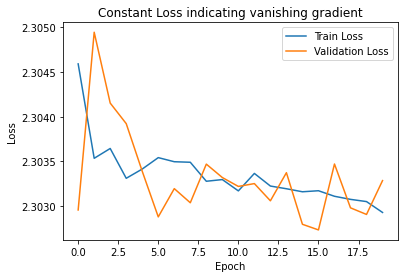

In [192]:
plt.plot(train_loss_vg, '-')
plt.plot(val_loss_vg, '-')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Train Loss', 'Validation Loss'])
plt.title('Constant Loss indicating vanishing gradient')

plt.show()

# 1.3 Methods to overcome Vanishing Gradient Problem

a) Using ReLU / LeakyReLU Activation Functions

In [193]:
device = 'cpu'
input_size = 3072 # 32x32x3 = 3072, size of CIFAR10 images (RGB)
num_classes = 10
learning_rate = 0.001
num_epochs = 20

model_deep = Deep_NN(input_size=input_size, num_classes=num_classes, activation = 'leakyrelu').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep.parameters(), lr=learning_rate, weight_decay=1e-5)

train_loss_lr = []
train_acc_lr = []
val_loss_lr = []
val_acc_lr = []

In [194]:
train(train_loader, model_deep, train_loss_lr, train_acc_lr, val_loss_lr, val_acc_lr)

Epoch: 0 | tensor([[ 0.0121, -0.0011, -0.0274,  ..., -0.0211,  0.0288, -0.0213],
        [ 0.0293, -0.0287,  0.0082,  ...,  0.0198,  0.0248,  0.0023],
        [-0.0089,  0.0275, -0.0091,  ..., -0.0015,  0.0045,  0.0228],
        ...,
        [-0.0158,  0.0050, -0.0184,  ..., -0.0233, -0.0270,  0.0280],
        [-0.0138, -0.0253, -0.0218,  ...,  0.0239,  0.0225,  0.0190],
        [-0.0125, -0.0199,  0.0190,  ..., -0.0002,  0.0267, -0.0203]],
       grad_fn=<AliasBackward0>)
Train Loss: 2.082 | Accuracy: 18.360 | Validation Loss: 1.980 | Accuracy: 23.300
Epoch: 1 | Train Loss: 1.888 | Accuracy: 28.991 | Validation Loss: 1.839 | Accuracy: 32.580
Epoch: 2 | Train Loss: 1.786 | Accuracy: 34.351 | Validation Loss: 1.745 | Accuracy: 37.100
Epoch: 3 | Train Loss: 1.711 | Accuracy: 37.700 | Validation Loss: 1.688 | Accuracy: 39.200
Epoch: 4 | Train Loss: 1.645 | Accuracy: 40.473 | Validation Loss: 1.620 | Accuracy: 42.480
Epoch: 5 | Train Loss: 1.584 | Accuracy: 42.713 | Validation Loss: 1.583 

In [195]:
test(test_loader, model_deep, loss_type = 'test')

Test Loss: 1.386 | Accuracy: 52.090


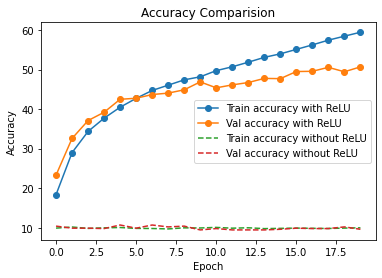

In [196]:
plt.plot(train_acc_lr,'-o')
plt.plot(val_acc_lr,'-o')

plt.plot(train_acc_vg,'--')
plt.plot(val_acc_vg,'--')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Train accuracy with ReLU', 'Val accuracy with ReLU', 'Train accuracy without ReLU', 'Val accuracy without ReLU',])
plt.title('Accuracy Comparision')

plt.show()

b) Using Batch Normalization and,

c)Using different Weight Initialization techniques:

In [197]:
class Deep_NN_BN(nn.Module):
    def __init__(self, input_size, num_classes, activation='sigmoid'):

        super().__init__()
        # Activation functions

        if activation == 'relu':
            self.activation = nn.ReLU()

        elif activation == 'tanh':
            self.activation = nn.Tanh()

        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        
        elif activation == 'leakyrelu':
            self.activation = nn.LeakyReLU()


        self.linear1 = nn.Linear(input_size, 2048)
        self.linear1_bn = nn.BatchNorm1d(2048)
        
        self.linear2 = nn.Linear(2048, 1024)
        self.linear2_bn = nn.BatchNorm1d(1024)

        # self.linear3 = nn.Linear(2048, 1024)
        # self.linear3_bn = nn.BatchNorm1d(1024)

        self.linear3 = nn.Linear(1024, 512)
        self.linear3_bn = nn.BatchNorm1d(512)

        self.linear4 = nn.Linear(512, 256)
        self.linear4_bn = nn.BatchNorm1d(256)

        self.linear5 = nn.Linear(256, 128)
        self.linear5_bn = nn.BatchNorm1d(128)

        self.linear6 = nn.Linear(128, 64)
        self.linear6_bn = nn.BatchNorm1d(64)

        self.linear7 = nn.Linear(64, 32)
        self.linear7_bn = nn.BatchNorm1d(32)

        self.linear8 = nn.Linear(32, 16)
        self.linear8_bn = nn.BatchNorm1d(16)

        self.linear9 = nn.Linear(16, num_classes)


    def forward(self, xb):

        out = self.activation(self.linear1(xb))
        out = self.linear1_bn(out)

        out = self.activation(self.linear2(out))
        out = self.linear2_bn(out)

        out = self.activation(self.linear3(out))
        out = self.linear3_bn(out)

        out = self.activation(self.linear4(out))
        out = self.linear4_bn(out)

        out = self.activation(self.linear5(out))
        out = self.linear5_bn(out)

        out = self.activation(self.linear6(out))
        out = self.linear6_bn(out)

        out = self.activation(self.linear7(out))
        out = self.linear7_bn(out)

        out = self.activation(self.linear8(out))
        out = self.linear8_bn(out)

        out = self.linear9(out)
        return out


In [204]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 3072 # 32x32x3 = 3072, size of CIFAR10 images (RGB)
num_classes = 10
learning_rate = 0.001
num_epochs = 20

model_deep = Deep_NN_BN(input_size=input_size, num_classes=num_classes, activation = 'relu').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep.parameters(), lr=learning_rate, weight_decay=1e-5)


####   Weight Initialization  ####
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)


model_deep.apply(init_weights)
###################################


train_loss_f = []
train_acc_f = []
val_loss_f = []
val_acc_f = []

<ipython-input-204-de153e355245>:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(m.weight)


In [205]:
train(train_loader, model_deep, train_loss_f, train_acc_f, val_loss_f, val_acc_f)

Train Loss: 1.894 | Accuracy: 32.944 | Validation Loss: 1.781 | Accuracy: 36.980
Train Loss: 1.667 | Accuracy: 40.709 | Validation Loss: 1.658 | Accuracy: 40.540
Train Loss: 1.563 | Accuracy: 44.391 | Validation Loss: 1.634 | Accuracy: 41.420
Train Loss: 1.495 | Accuracy: 46.909 | Validation Loss: 1.608 | Accuracy: 42.820
Train Loss: 1.438 | Accuracy: 49.069 | Validation Loss: 1.591 | Accuracy: 42.760
Train Loss: 1.386 | Accuracy: 50.940 | Validation Loss: 1.546 | Accuracy: 45.640
Train Loss: 1.342 | Accuracy: 52.431 | Validation Loss: 1.576 | Accuracy: 42.800
Train Loss: 1.297 | Accuracy: 53.878 | Validation Loss: 1.647 | Accuracy: 43.960
Train Loss: 1.248 | Accuracy: 56.020 | Validation Loss: 1.516 | Accuracy: 47.340
Train Loss: 1.204 | Accuracy: 57.293 | Validation Loss: 1.532 | Accuracy: 47.440
Train Loss: 1.160 | Accuracy: 58.798 | Validation Loss: 1.687 | Accuracy: 43.340
Train Loss: 1.111 | Accuracy: 60.660 | Validation Loss: 1.418 | Accuracy: 51.660
Train Loss: 1.059 | Accuracy

In [206]:
test(test_loader, model_deep, loss_type = 'test')

Test Loss: 1.562 | Accuracy: 51.410


# Question 2

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import random
import torch
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
import torchvision
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np
import tqdm

In [ ]:
class GurNumDataset(Dataset):

    def __init__(self,  mode):
        self.mode = mode
        if self.mode == "Train":
            self.num= 999
        else:
            self.num = 99

    def __getitem__(self, rand_vid):
        if self.mode == "Train":
            path = "/content/drive/MyDrive/GurNum/train"
        else: 
            path = "/content/drive/MyDrive/GurNum/val"
        rand = np.random.choice(10) 
        label = rand
        fol_path = os.path.join(path,str(rand))
        image = os.listdir(fol_path)[np.random.choice(range(len(os.listdir(fol_path))))]
        #print(image)
        img_path = os.path.join(fol_path,image)
        X = np.array(cv2.imread(img_path))
        img = X.reshape(1,32*32*3)
        lbl = [0 for i in range(10)]
        lbl[rand] = 1
        lbl = np.array(lbl)
        img = img.astype(np.float32)
        
        return img,lbl
       
    
    def __len__(self):
        return self.num



torch.manual_seed(43)
batch_size = 256
train_dataset = GurNumDataset("Train")
val_dataset = GurNumDataset("Val")


train_loader = DataLoader( dataset=train_dataset, batch_size=batch_size, shuffle=True )
val_loader = DataLoader( dataset=val_dataset, batch_size=batch_size, shuffle=True )


Training the Neural Network without using any Regularization Technique:

In [ ]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes, activation='sigmoid'):

        super().__init__()
        # Activation functions

        if activation == 'relu':
            self.activation = nn.ReLU()

        elif activation == 'tanh':
            self.activation = nn.Tanh()

        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        
        elif activation == 'leakyrelu':
            self.activation = nn.LeakyReLU()


        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 32)
        self.linear5 = nn.Linear(32, num_classes)

    def forward(self, xb):

        out = self.activation(self.linear1(xb))

        out = self.activation(self.linear2(out))

        out = self.activation(self.linear3(out))

        out = self.activation(self.linear4(out))
        out = self.linear5(out)
        return out

train_losses=[]
train_accu=[]

eval_losses=[]
eval_accu=[]

def test(loader, model, eval_losses = eval_losses, eval_accu = eval_accu):
    model.eval()

    running_loss=0
    correct=0
    total=0

    with torch.no_grad():
        for x, y in loader:
            x = x/255.0
            x = x.to(device=device)
            y = y.to(device=device)

            x = torch.flatten(x,1)

            scores = model(x)

            y = y.long()
            

            a = y.numpy()
            a = np.where(a==1)[1]
            y = a

            y = torch.Tensor(y)
            y = y.type(torch.LongTensor)


            loss= criterion(scores,y)
            running_loss+=loss.item()
            
            _, predicted = scores.max(1)
            total += y.size(0)
            correct += predicted.eq(y).sum().item()

    test_loss=running_loss/len(loader)
    accu=100.*correct/total

    eval_losses.append(test_loss)
    eval_accu.append(accu)

    print('Validation Loss: %.3f | Accuracy: %.3f'%(test_loss,accu))

    model.train()


def train_noreg(loader, model, train_losses, train_accu, eval_losses, eval_accu):

    for epoch in range(num_epochs):
        print(f"Epoch: {epoch}", end=' | ')

        running_loss=0
        correct=0
        total=0


        for batch_idx, (data,targets) in enumerate(train_loader):
            
            data = data/255.0
            data = data.to(device=device)
            targets = targets.to(device=device)

            data = torch.flatten(data,1)
            # print(data.shape)


            # forward propagation
            scores = model(data)

            targets = targets.long()
            

            a = targets.numpy()
            a = np.where(a==1)[1]
            targets = a

            targets = torch.Tensor(targets)
            targets = targets.type(torch.LongTensor)


            loss = criterion(scores, targets)


            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            running_loss += loss.item()
        
            _, predicted = scores.max(1)

            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()


        train_loss=running_loss/len(train_loader)
        accu=100.*correct/total

        train_accu.append(accu)
        train_losses.append(train_loss)
        print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu), end = ' | ')

        test(val_loader, model, eval_losses, eval_accu)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 3072
num_classes = 10
learning_rate = 0.001
num_epochs = 40

model = NN(input_size=input_size, num_classes=num_classes, activation = 'relu').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_loss = []
train_acc = []
val_loss = []
val_acc = []

In [ ]:
train_noreg(train_loader, model, train_loss, train_acc, val_loss, val_acc)

Epoch: 0 | Train Loss: 2.290 | Accuracy: 14.314 | Validation Loss: 2.282 | Accuracy: 16.162
Epoch: 1 | Train Loss: 2.062 | Accuracy: 44.745 | Validation Loss: 1.785 | Accuracy: 47.475
Epoch: 2 | Train Loss: 1.591 | Accuracy: 50.751 | Validation Loss: 1.494 | Accuracy: 46.465
Epoch: 3 | Train Loss: 1.096 | Accuracy: 71.071 | Validation Loss: 1.070 | Accuracy: 59.596
Epoch: 4 | Train Loss: 0.711 | Accuracy: 80.781 | Validation Loss: 0.883 | Accuracy: 62.626
Epoch: 5 | Train Loss: 0.478 | Accuracy: 85.385 | Validation Loss: 0.580 | Accuracy: 84.848
Epoch: 6 | Train Loss: 0.382 | Accuracy: 86.486 | Validation Loss: 0.556 | Accuracy: 74.747
Epoch: 7 | Train Loss: 0.319 | Accuracy: 89.790 | Validation Loss: 0.366 | Accuracy: 81.818
Epoch: 8 | Train Loss: 0.231 | Accuracy: 91.291 | Validation Loss: 0.537 | Accuracy: 84.848
Epoch: 9 | Train Loss: 0.201 | Accuracy: 93.794 | Validation Loss: 0.340 | Accuracy: 88.889
Epoch: 10 | Train Loss: 0.197 | Accuracy: 93.393 | Validation Loss: 0.449 | Accu

## 2.1 Comparing Regularization Techniques

Neural Network with implementation of L1 and L2 Regularization Techiniques:

In [ ]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes, activation='sigmoid'):

        super().__init__()
        # Activation functions

        if activation == 'relu':
            self.activation = nn.ReLU()

        elif activation == 'tanh':
            self.activation = nn.Tanh()

        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        
        elif activation == 'leakyrelu':
            self.activation = nn.LeakyReLU()


        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 32)
        self.linear5 = nn.Linear(32, num_classes)

    def forward(self, xb):

        out = self.activation(self.linear1(xb))

        out = self.activation(self.linear2(out))

        out = self.activation(self.linear3(out))

        out = self.activation(self.linear4(out))
        out = self.linear5(out)
        return out



In [ ]:
train_losses=[]
train_accu=[]

eval_losses=[]
eval_accu=[]

def test(loader, model, eval_losses = eval_losses, eval_accu = eval_accu):
    model.eval()

    running_loss=0
    correct=0
    total=0

    with torch.no_grad():
        for x, y in loader:
            x = x/255.0
            x = x.to(device=device)
            y = y.to(device=device)

            x = torch.flatten(x,1)

            scores = model(x)

            y = y.long()
            

            a = y.numpy()
            a = np.where(a==1)[1]
            y = a

            y = torch.Tensor(y)
            y = y.type(torch.LongTensor)


            loss= criterion(scores,y)
            running_loss+=loss.item()
            
            _, predicted = scores.max(1)
            total += y.size(0)
            correct += predicted.eq(y).sum().item()

    test_loss=running_loss/len(loader)
    accu=100.*correct/total

    eval_losses.append(test_loss)
    eval_accu.append(accu)

    print('Validation Loss: %.3f | Accuracy: %.3f'%(test_loss,accu))

    model.train()


def train_with_reg(loader, model, train_losses, train_accu, eval_losses, eval_accu, reg='L2', lambda_=0.001):

    for epoch in range(num_epochs):
        print(f"Epoch: {epoch}", end=' | ')

        running_loss=0
        correct=0
        total=0


        for batch_idx, (data,targets) in enumerate(train_loader):

            data = data/255.0
            data = data.to(device=device)
            targets = targets.to(device=device)

            data = torch.flatten(data,1)
            # print(data.shape)


            # forward propagation
            scores = model(data)

            targets = targets.long()
            

            a = targets.numpy()
            a = np.where(a==1)[1]
            targets = a

            targets = torch.Tensor(targets)
            targets = targets.type(torch.LongTensor)


            loss = criterion(scores, targets)


            #########  REGULARIZATION    ############
            if(reg == 'L1'):
                l1_norm = sum(abs(p).sum() for p in model.parameters())         # L1 Regularization
                loss = loss + lambda_ * l1_norm

            else:
                l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())     # L2 Regularization
                loss = loss + lambda_ * l2_norm
            #########################################

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            running_loss += loss.item()
        
            _, predicted = scores.max(1)

            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()


        train_loss=running_loss/len(train_loader)
        accu=100.*correct/total

        train_accu.append(accu)
        train_losses.append(train_loss)
        print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu), end = ' | ')

        test(val_loader, model, eval_losses, eval_accu)


Testing for L1 Regularization

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 3072
num_classes = 10
learning_rate = 0.001
num_epochs = 40

model = NN(input_size=input_size, num_classes=num_classes, activation = 'relu').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_loss_l1 = []
train_acc_l1 = []
val_loss_l1 = []
val_acc_l1 = []

In [ ]:
train_with_reg(train_loader, model, train_loss_l1, train_acc_l1, val_loss_l1, val_acc_l1, 'L1', 0.0001)

Epoch: 0 | Train Loss: 5.653 | Accuracy: 10.110 | Validation Loss: 2.229 | Accuracy: 16.162
Epoch: 1 | Train Loss: 4.574 | Accuracy: 32.132 | Validation Loss: 2.061 | Accuracy: 19.192
Epoch: 2 | Train Loss: 3.663 | Accuracy: 40.240 | Validation Loss: 1.829 | Accuracy: 39.394
Epoch: 3 | Train Loss: 2.914 | Accuracy: 50.450 | Validation Loss: 1.515 | Accuracy: 44.444
Epoch: 4 | Train Loss: 2.470 | Accuracy: 54.755 | Validation Loss: 1.175 | Accuracy: 47.475
Epoch: 5 | Train Loss: 2.080 | Accuracy: 71.772 | Validation Loss: 0.968 | Accuracy: 67.677
Epoch: 6 | Train Loss: 1.768 | Accuracy: 80.380 | Validation Loss: 0.952 | Accuracy: 68.687
Epoch: 7 | Train Loss: 1.555 | Accuracy: 81.481 | Validation Loss: 0.639 | Accuracy: 83.838
Epoch: 8 | Train Loss: 1.470 | Accuracy: 84.284 | Validation Loss: 1.050 | Accuracy: 59.596
Epoch: 9 | Train Loss: 1.373 | Accuracy: 84.484 | Validation Loss: 0.548 | Accuracy: 82.828
Epoch: 10 | Train Loss: 1.194 | Accuracy: 91.391 | Validation Loss: 0.546 | Accu

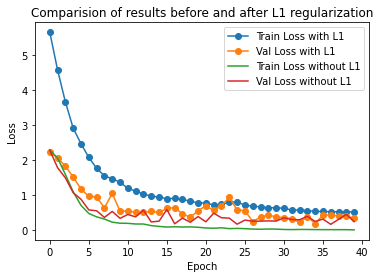

In [ ]:
plt.plot(train_loss_l1,'-o')
plt.plot(val_loss_l1,'-o')

plt.plot(train_loss,'-')
plt.plot(val_loss,'-')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Train Loss with L1','Val Loss with L1','Train Loss without L1','Val Loss without L1' ])
plt.title('Comparision of results before and after L1 regularization')

plt.show()

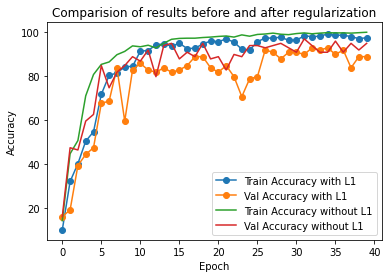

In [ ]:
plt.plot(train_acc_l1,'-o')
plt.plot(val_acc_l1,'-o')

plt.plot(train_acc,'-')
plt.plot(val_acc,'-')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Train Accuracy with L1','Val Accuracy with L1','Train Accuracy without L1','Val Accuracy without L1' ])
plt.title('Comparision of results before and after regularization')

plt.show()

Testing for L2 Regularization

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 3072
num_classes = 10
learning_rate = 0.001
num_epochs = 40

model = NN(input_size=input_size, num_classes=num_classes, activation = 'relu').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_loss_l2 = []
train_acc_l2 = []
val_loss_l2 = []
val_acc_l2 = []

In [ ]:
train_with_reg(train_loader, model, train_loss_l2, train_acc_l2, val_loss_l2, val_acc_l2, 'L2', 0.0001)

Epoch: 0 | Train Loss: 2.334 | Accuracy: 13.514 | Validation Loss: 2.126 | Accuracy: 35.354
Epoch: 1 | Train Loss: 2.101 | Accuracy: 32.933 | Validation Loss: 1.804 | Accuracy: 46.465
Epoch: 2 | Train Loss: 1.703 | Accuracy: 57.057 | Validation Loss: 1.751 | Accuracy: 43.434
Epoch: 3 | Train Loss: 1.359 | Accuracy: 54.955 | Validation Loss: 1.288 | Accuracy: 60.606
Epoch: 4 | Train Loss: 0.998 | Accuracy: 70.671 | Validation Loss: 1.005 | Accuracy: 61.616
Epoch: 5 | Train Loss: 0.757 | Accuracy: 80.581 | Validation Loss: 0.937 | Accuracy: 68.687
Epoch: 6 | Train Loss: 0.604 | Accuracy: 83.984 | Validation Loss: 0.722 | Accuracy: 72.727
Epoch: 7 | Train Loss: 0.489 | Accuracy: 87.087 | Validation Loss: 0.566 | Accuracy: 85.859
Epoch: 8 | Train Loss: 0.359 | Accuracy: 91.291 | Validation Loss: 0.406 | Accuracy: 87.879
Epoch: 9 | Train Loss: 0.264 | Accuracy: 93.193 | Validation Loss: 0.420 | Accuracy: 83.838
Epoch: 10 | Train Loss: 0.298 | Accuracy: 92.793 | Validation Loss: 0.465 | Accu

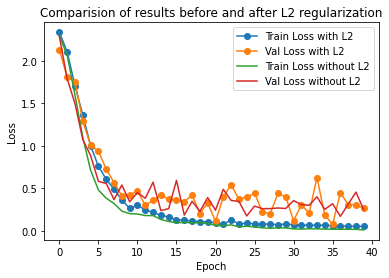

In [ ]:

plt.plot(train_loss_l2,'-o')
plt.plot(val_loss_l2,'-o')

plt.plot(train_loss,'-')
plt.plot(val_loss,'-')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Train Loss with L2','Val Loss with L2','Train Loss without L2','Val Loss without L2' ])
plt.title('Comparision of results before and after L2 regularization')

plt.show()

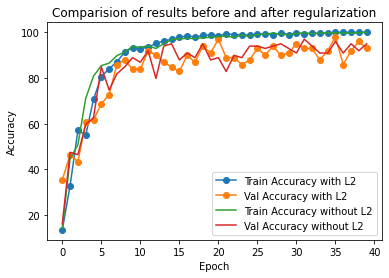

In [ ]:
plt.plot(train_acc_l2,'-o')
plt.plot(val_acc_l2,'-o')

plt.plot(train_acc,'-')
plt.plot(val_acc,'-')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Train Accuracy with L2','Val Accuracy with L2','Train Accuracy without L2','Val Accuracy without L2' ])
plt.title('Comparision of results before and after regularization')

plt.show()

2.3) Dropout Regularization

In [ ]:
class NN_dropout(nn.Module):
    def __init__(self, input_size, num_classes, activation='sigmoid'):

        super().__init__()
        # Activation functions

        if activation == 'relu':
            self.activation = nn.ReLU()

        elif activation == 'tanh':
            self.activation = nn.Tanh()

        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        
        elif activation == 'leakyrelu':
            self.activation = nn.LeakyReLU()


        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 32)
        self.linear5 = nn.Linear(32, num_classes)

        self.dropout = nn.Dropout(0.15)

    def forward(self, xb):

        out = self.activation(self.linear1(xb))
        out = self.dropout(out)

        out = self.activation(self.linear2(out))
        out = self.dropout(out)

        out = self.activation(self.linear3(out))
        out = self.dropout(out)

        out = self.activation(self.linear4(out))
        out = self.dropout(out)

        out = self.linear5(out)
        return out



In [ ]:
train_losses=[]
train_accu=[]

eval_losses=[]
eval_accu=[]

weights_l1_e1 = []
weights_l1_en = []

def test(loader, model, eval_losses = eval_losses, eval_accu = eval_accu):
    model.eval()

    running_loss=0
    correct=0
    total=0

    with torch.no_grad():
        for x, y in loader:
            x = x/255.0
            x = x.to(device=device)
            y = y.to(device=device)

            x = torch.flatten(x,1)

            scores = model(x)

            y = y.long()
            

            a = y.numpy()
            a = np.where(a==1)[1]
            y = a

            y = torch.Tensor(y)
            y = y.type(torch.LongTensor)


            loss= criterion(scores,y)
            running_loss+=loss.item()
            
            _, predicted = scores.max(1)
            total += y.size(0)
            correct += predicted.eq(y).sum().item()

    test_loss=running_loss/len(loader)
    accu=100.*correct/total

    eval_losses.append(test_loss)
    eval_accu.append(accu)

    print('Validation Loss: %.3f | Accuracy: %.3f'%(test_loss,accu))

    model.train()


def train(loader, model, train_losses, train_accu, eval_losses, eval_accu):

    for epoch in range(num_epochs):
        print(f"Epoch: {epoch}", end=' | ')

        running_loss=0
        correct=0
        total=0

        for batch_idx, (data,targets) in enumerate(train_loader):

            # Get data to cuda if possible
            data = data/255.0
            data = data.to(device=device)
            targets = targets.to(device=device)

            data = torch.flatten(data,1)
            # print(data.shape)


            # forward propagation
            scores = model(data)

            targets = targets.long()
            

            a = targets.numpy()
            a = np.where(a==1)[1]
            targets = a

            targets = torch.Tensor(targets)
            targets = targets.type(torch.LongTensor)


            loss = criterion(scores, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            running_loss += loss.item()
        
            _, predicted = scores.max(1)

            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()


        train_loss=running_loss/len(train_loader)
        accu=100.*correct/total

        train_accu.append(accu)
        train_losses.append(train_loss)
        print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu), end = ' | ')

        test(val_loader, model, eval_losses, eval_accu)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 3072
num_classes = 10
learning_rate = 0.001
num_epochs = 40

model = NN_dropout(input_size=input_size, num_classes=num_classes, activation = 'relu').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_loss_drop = []
train_acc_drop = []
val_loss_drop = []
val_acc_drop = []

In [ ]:
train(train_loader, model, train_loss_drop, train_acc_drop, val_loss_drop, val_acc_drop)

Epoch: 0 | Train Loss: 2.308 | Accuracy: 12.012 | Validation Loss: 2.257 | Accuracy: 34.343
Epoch: 1 | Train Loss: 2.184 | Accuracy: 20.821 | Validation Loss: 2.033 | Accuracy: 33.333
Epoch: 2 | Train Loss: 1.923 | Accuracy: 31.632 | Validation Loss: 1.828 | Accuracy: 33.333
Epoch: 3 | Train Loss: 1.610 | Accuracy: 38.238 | Validation Loss: 1.488 | Accuracy: 41.414
Epoch: 4 | Train Loss: 1.301 | Accuracy: 49.550 | Validation Loss: 0.955 | Accuracy: 71.717
Epoch: 5 | Train Loss: 1.097 | Accuracy: 62.462 | Validation Loss: 0.981 | Accuracy: 74.747
Epoch: 6 | Train Loss: 0.743 | Accuracy: 75.976 | Validation Loss: 0.735 | Accuracy: 81.818
Epoch: 7 | Train Loss: 0.636 | Accuracy: 77.678 | Validation Loss: 0.344 | Accuracy: 93.939
Epoch: 8 | Train Loss: 0.495 | Accuracy: 81.682 | Validation Loss: 0.298 | Accuracy: 90.909
Epoch: 9 | Train Loss: 0.408 | Accuracy: 85.185 | Validation Loss: 0.356 | Accuracy: 86.869
Epoch: 10 | Train Loss: 0.325 | Accuracy: 88.288 | Validation Loss: 0.368 | Accu

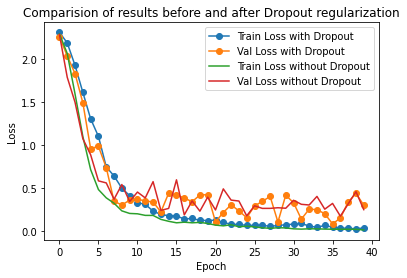

In [ ]:

plt.plot(train_loss_drop,'-o')
plt.plot(val_loss_drop,'-o')

plt.plot(train_loss,'-')
plt.plot(val_loss,'-')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Train Loss with Dropout','Val Loss with Dropout','Train Loss without Dropout','Val Loss without Dropout' ])
plt.title('Comparision of results before and after Dropout regularization')

plt.show()

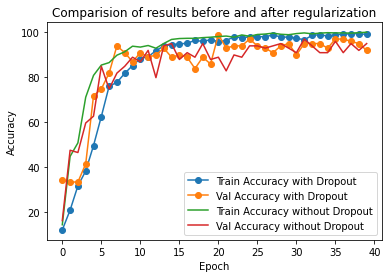

In [ ]:
plt.plot(train_acc_drop,'-o')
plt.plot(val_acc_drop,'-o')

plt.plot(train_acc,'-')
plt.plot(val_acc,'-')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Train Accuracy with Dropout','Val Accuracy with Dropout','Train Accuracy without Dropout','Val Accuracy without Dropout' ])
plt.title('Comparision of results before and after regularization')

plt.show()

## 2.2 Gradient Checking

In [ ]:
model = NN_dropout(input_size=input_size, num_classes=num_classes, activation = 'relu').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def gradient_check(model, epsilon,optimizer,criterion,  X, t):
    ## add epsilon to lst layer of the model
    with torch.no_grad():
        model.linear5.weight += epsilon
        logits = model(X)
        logits = logits.view(-1, 10)
        ## compute loss
        loss1 = criterion(logits, t)
        print(loss1)

        model.linear5.weight -= 2*epsilon

        logits = model(X)
        logits = logits.view(-1, 10)
        
        loss2 = criterion(logits, t)
        print(loss2)
        grad = (loss1 - loss2)/(2*epsilon)

        model.linear5.weight += epsilon

    logits = model(X)
    logits = logits.view(-1, 10)

    loss3 = criterion(logits, t)
    optimizer.zero_grad()
    loss3.backward()

    original_grad = model.linear5.weight.grad

    return grad,  torch.norm(original_grad), torch.abs(grad - torch.norm(original_grad))/len(X)

In [ ]:
X, targets = next(iter(train_loader))

In [ ]:
targets = targets.long()
            
a = targets.numpy()
a = np.where(a==1)[1]
targets = a

targets = torch.Tensor(targets)
targets = targets.type(torch.LongTensor)

In [ ]:
torch.max(targets)

tensor(9)

In [ ]:
# X = X/255.0

In [ ]:
l1, l2, diff = gradient_check(model, 1e-7, optimizer, nn.CrossEntropyLoss(), X,targets)

tensor(2.3025)
tensor(2.3026)


In [ ]:
diff

tensor(0.0175)